<a href="https://colab.research.google.com/github/kvyuan/v-ratio-momentum-and-ladder/blob/master/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
!git clone https://github.com/kvyuan/v-ratio-momentum-and-ladder.git

Cloning into 'v-ratio-momentum-and-ladder'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 167 (delta 69), reused 129 (delta 39), pack-reused 0
Receiving objects: 100% (167/167), 5.22 MiB | 12.16 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [10]:
ls

drive/  sample_data/  v-ratio-momentum-and-ladder/


In [11]:
cd drive/


/content/drive


In [12]:
ls


'My Drive'/


In [13]:
cd My Drive

/content/drive/My Drive


In [14]:
ls

 01.pdf
 05.pdf
 2013-01-25_11-54-18_459.jpg
 2013-01-25_11-54-50_832.jpg
 2013-01-29_16-44-31_35.jpg
 2013-01-29_16-44-38_920.jpg
 2013-02-05_16-44-23_9.jpg
 2013-02-12_10-00-52_185.jpg
 2013-02-19_21-31-32_145.jpg
 2013-fall-soln.pdf
 20180808183607475.pdf
 23_Time-Series-Prediction.ipynb
 3.3.1-Inf-BP-Alg.pdf
 3.3.2-Inf-BP-Cgraph.pdf
 3.3.3-Inf-BP-properties.pdf
 5.2.1-Learn-param-MLE.pdf
 5.2.2-Learn-BNparam-MLE.pdf
 5.2.3-Learn-BNparam-BayesianEstimation.pdf
 5.2.4-Learn-BNparam-BayesianPrediction.pdf
 5.2.5-Learn-BNparam-BayesianBN.pdf
'a3 q1b and q1c ecse 221.pdf'
'A3Q1 D100 Time File.txt'
'A3 swimlane .gdraw'
 Addresses.gdoc
'AeroMexico Club Premier .gdoc'
'Airbnb camahuiroa'/
'Airbnb Montreal'/
 ALL0008/
'Apartamento Montreal'/
 apartment/
'Apartment Failure modes checklist.gdoc'
'APARTMENT HUNTING .gdoc'
'apartment hunting montreal.gdoc'
'Apartments in Toronto.gmap'
'applications banner .jpg'
'April 2020 plan.gsheet'
'APS 1051 - Session 2 notes.gdoc'
 armando.docx
 armando.gd

In [15]:
cd u\ of\ t

/content/drive/My Drive/u of t


In [16]:
cd APS 1051 Portfolio Optimization

/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization


In [17]:
cd Final\ Project

/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization/Final Project


In [18]:
!git clone https://github.com/kvyuan/v-ratio-momentum-and-ladder.git

fatal: destination path 'v-ratio-momentum-and-ladder' already exists and is not an empty directory.


In [19]:
ls

Deliverables/  Untitled0.ipynb  v-ratio-momentum-and-ladder/


In [20]:
cd v-ratio-momentum-and-ladder/

/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization/Final Project/v-ratio-momentum-and-ladder


In [21]:
!pip install yfinance

In [22]:
ls

 computation_helper.ipynb             __pycache__/
 computation_helper.py                README.md
 data/                                Results/
 data_helper.ipynb                    rotational_momentum.ipynb
 data_helper.py                       rotational_momentum.py
'function and class mapping.drawio'   Test_code.ipynb
 Portfolio.ipynb                      WhiteRealityCheckFor1.ipynb
 portfolio.py                         WhiteRealityCheckFor1.py


In [23]:
from os.path import isfile
import yfinance as yf
import pandas as pd
import numpy as np
import re
import math
import WhiteRealityCheckFor1
import matplotlib.pyplot as plt
from matplotlib import style
import itertools

from computation_helper import *
from data_helper import *
import rotational_momentum as rm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:


class Portfolio:

    def __init__(self, tickers_str):
      """ Initializes a portfolio with its corresponding tickers 
      
    Args:
      tickers_str : str
          A string representing a list of tickers. 
    
    Returns:
      Nothing 
    """
    

        self.tickers_str = tickers_str
        self.tickers_list = tickers_str.split()
        self.tickers_densed_str = ''.join(tickers_str.split())
        self.data_dict = {}

    #TODO: move this to data_helper.py
    def download_data(self, datafile_alias, start_date, end_date):

        #declare price history location
        base_name = datafile_alias + "_" + start_date + "_" + end_date
        file_dir = "data/" + base_name + ".csv"
        ap_file_dir = "data/" + base_name + "_AP.csv"
        self.data_dict[datafile_alias] = [file_dir, ap_file_dir]

        #download and save price history if not found locally
        if not (isfile(file_dir)):
            price_df = yf.download(self.tickers_str,
                                   start= start_date,
                                   end= end_date)
            price_df["Adj Close"].to_csv(ap_file_dir, header=True)
            price_df["Close"].to_csv(file_dir, header=True)

        else:
            print("requested data history already exists!")

        return


    def _load_data(self, datafile_alias):

        file_dir = self.data_dict[datafile_alias][0]
        ap_file_dir = self.data_dict[datafile_alias][1]

        dfP = pd.read_csv(file_dir, parse_dates=['Date'])
        dfAP = pd.read_csv(ap_file_dir, parse_dates=['Date'])
        dfP = dfP.sort_values(by='Date')
        dfAP = dfAP.sort_values(by='Date')
        dfP.set_index('Date', inplace = True)
        dfAP.set_index('Date', inplace = True)
        dfP['CASH'] = 1
        dfAP['CASH'] = 1
        return dfP, dfAP


    #TODO: parse frequency_str to return freq, shift and number of
    #sub backtesting
    def _parse_frequency(self, frequency_str):

        size = int(re.search("\d+%", frequency_str).group().strip("%"))
        shift_num = int(int(re.match("\d+", frequency_str).group()) * size / 100)
        shift_unit = re.search("[A-Z]-[A-Z]*", frequency_str).group()
        freq = re.match("\d+[A-Z]-[A-Z]*", frequency_str).group()
        return freq, shift_num, shift_unit, int(100/size)


    def _evaluate(self, df_list):

        #evaluate each sub portfolio
        for df in df_list:
            dfPRR, TotaAnnReturn, CAGR, sharpe, volatility, p_val = evaluate(df)

        #join all result df and evaluate
        n = len(df_list)
        if n > 1:
            dfPRR = df_list[0]
            #aggregate ALL_R and DETREND_ALL_R
            for i in range(1,n):
                dfPRR.ALL_R += df_list[i].ALL_R
                dfPRR.DETREND_ALL_R += df_list[i].DETREND_ALL_R
            dfPRR.ALL_R = dfPRR.ALL_R / n
            dfPRR.DETREND_ALL_R = dfPRR.DETREND_ALL_R / n

            #update I
            dfPRR = dfPRR.assign(I =np.cumprod(1+dfPRR['ALL_R']))
            dfPRR.iat[0,dfPRR.columns.get_loc('I')]= 1

            #update DETREND_I
            dfPRR = dfPRR.assign(DETREND_I =np.cumprod(1+dfPRR['DETREND_ALL_R']))
            dfPRR.iat[0,dfPRR.columns.get_loc('DETREND_I')]= 1
            print("\n==================Overall==================")
            dfPRR, TotaAnnReturn, CAGR, sharpe, volatility, p_val = evaluate(dfPRR)


        return dfPRR, TotaAnnReturn, CAGR, sharpe, volatility

    #entry point of the backtest
    def backtest(self, datafile_alias, lookback, Frequency, ShortTermWeight,
                 LongTermWeight, RSI_weight, v_ratio_weight, Z_weight):

        dfP, dfAP = self._load_data(datafile_alias)

        #TODO: call _parse_frequency
        freq, shift_num, shift_unit, n = self._parse_frequency(Frequency)

        #TODO: loop call the strategy execution function
        #to generate result files
        df_list = []
        for i in range(n):
            #use momentum trading here
            each_shift = str(shift_num * i) + shift_unit
            df = rm.rotational_momentum(dfP, dfAP, lookback, freq, each_shift,
                                        ShortTermWeight,
                                        LongTermWeight, RSI_weight,
                                        v_ratio_weight, Z_weight)

            file_dir = "Results/" + datafile_alias + "_" + str(i+1) + ".csv"
            df.to_csv(file_dir, header = True, index=True)
            df_list.append(df)

        #TODO: call _evaluate
        df, TotaAnnReturn, CAGR, sharpe, volatility = self._evaluate(df_list)

        return df, TotaAnnReturn, CAGR, sharpe, volatility

    #TODO: call backtest to collect performance of each params combo
    def grid_search(self, datafile_alias, lookback, Frequency, ShortTermWeight,
                 LongTermWeight, RSI_weight, v_ratio_weight, Z_weight):

        #create cartesian product of params list
# =============================================================================
#         itertools example of param_1 [1,2] and param_2 [3,4]
#         grid = list(itertools.product([1, 2],[3, 4]))
#         grid should contain (1,3), (1,4), (2,3), (2,4)
# =============================================================================
        results = []
        grid = list(itertools.product(lookback, Frequency,
                                      ShortTermWeight, LongTermWeight,
                                      RSI_weight, v_ratio_weight, Z_weight))

        for combo in grid:
            print(combo)
            #call self.backtest
            df, TotalAnnReturn, CAGR, sharpe, volatility\
            = self.backtest(datafile_alias, combo[0], combo[1], combo[2], combo[3],
                       combo[4], combo[5], combo[6])
            output = [combo[0], combo[1], combo[2], combo[3],combo[4],
                      combo[5], combo[6], TotalAnnReturn, CAGR,
                      sharpe, volatility]
            results.append(output)

        result_df = pd.DataFrame.from_records(data=results,
                                              columns=["lookback",
                                                       "frequency",
                                                       "ShortTermWeight",
                                                       "LongTermWeight",
                                                       "RSI_weight",
                                                       "v_ratio_weight",
                                                       "Z_weight",
                                                       "TotalAnnReturn",
                                                       "CAGR",
                                                       "sharpe",
                                                       "volatility"])

        file_dir = "Results/" + datafile_alias + "_gs" + ".csv"
        result_df.to_csv(file_dir, header = True, index=True)
        return

# =============================================================================
# #example
# portfolio = Portfolio("SPY AAPL")
# portfolio.download_data("train", "2004-01-01", "2015-12-31")
# portfolio.backtest("train")
# =============================================================================




In [25]:
portf = Portfolio("AAPL, WMT, INTC, NFLX")




In [27]:
ls

 computation_helper.ipynb             __pycache__/
 computation_helper.py                README.md
 data/                                Results/
 data_helper.ipynb                    rotational_momentum.ipynb
 data_helper.py                       rotational_momentum.py
'function and class mapping.drawio'   Test_code.ipynb
 Portfolio.ipynb                      WhiteRealityCheckFor1.ipynb
 portfolio.py                         WhiteRealityCheckFor1.py


In [ ]:
print(portf._parse_frequency("4W-FRI-25%"))

('4W-FRI', 1, 'W-FRI', 4)


In [ ]:
portf.download_data("experiment6", "2004-01-01", "2008-12-31")

[*********************100%***********************]  4 of 4 completed


In [ ]:
portf.download_data("experiment6", "2004-01-01", "2008-12-31")


requested data history already exists!


/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization/Final Project/v-ratio-momentum-and-ladder/computation_helper.py:278: RuntimeWarning: invalid value encountered in double_scalars
  vratio = t/(lag*b);


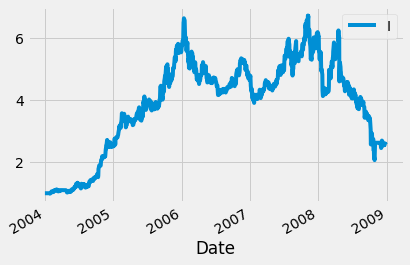

TotaAnnReturn = 30.736747
CAGR = 19.740000
Sharpe Ratio = 0.672000
Volatility= 0.402000
average return 0.000709
[-0.00316758  0.00326432]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.3284


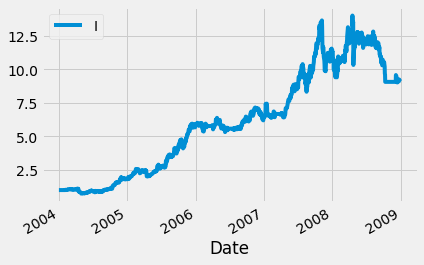

TotaAnnReturn = 159.976502
CAGR = 52.780000
Sharpe Ratio = 1.330000
Volatility= 0.392000
average return 0.002264
[-0.00271329  0.00284389]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.05740000000000001


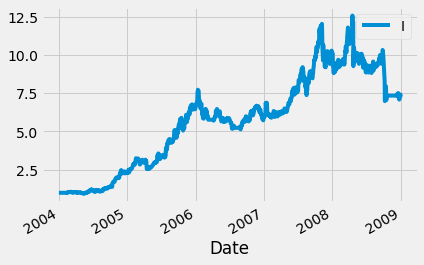

TotaAnnReturn = 127.798425
CAGR = 47.110000
Sharpe Ratio = 1.239000
Volatility= 0.387000
average return 0.001265
[-0.00278227  0.00292854]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.1936


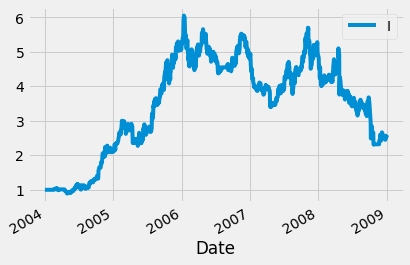

TotaAnnReturn = 31.345266
CAGR = 20.020000
Sharpe Ratio = 0.673000
Volatility= 0.410000
average return 0.001289
[-0.00313033  0.0031315 ]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.21540000000000004

==================Overall==================


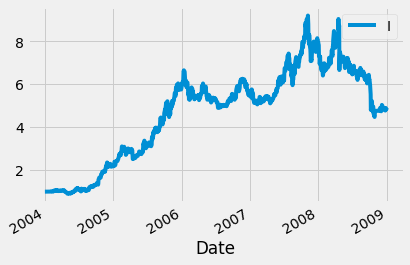

TotaAnnReturn = 77.032140
CAGR = 35.670000
Sharpe Ratio = 1.059000
Volatility= 0.365000
average return 0.001382
[-0.00257976  0.0026188 ]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.14959999999999996


(                AAPL      INTC      NFLX  ...  DETREND_ALL_R         I  DETREND_I
 Date                                      ...                                    
 2004-01-02       NaN       NaN       NaN  ...            NaN  1.000000   1.000000
 2004-01-05  0.041823  0.023320  0.019515  ...       0.000000  1.000000   1.000000
 2004-01-06 -0.003609 -0.000304  0.066369  ...       0.000000  1.000000   1.000000
 2004-01-07  0.022635  0.033130  0.044120  ...       0.000000  1.000000   1.000000
 2004-01-08  0.034086  0.007355 -0.002892  ...       0.000000  1.000000   1.000000
 ...              ...       ...       ...  ...            ...       ...        ...
 2008-12-23  0.007464 -0.018829 -0.027579  ...      -0.048381  4.780941   1.426973
 2008-12-24 -0.015513  0.011372  0.009576  ...       0.013755  4.810318   1.446601
 2008-12-26  0.009054 -0.003514  0.038307  ...       0.030785  4.898549   1.491135
 2008-12-29  0.009323 -0.003526 -0.018623  ...      -0.024960  4.842317   1.453916
 200

In [ ]:
portf.backtest("experiment6", 20, "4W-FRI-25%", 1, 2, 1, 0, 0)


(10, '1W-FRI-100%', 1, 2, 1, 0, 0)


/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization/Final Project/v-ratio-momentum-and-ladder/computation_helper.py:278: RuntimeWarning: invalid value encountered in double_scalars
  vratio = t/(lag*b);


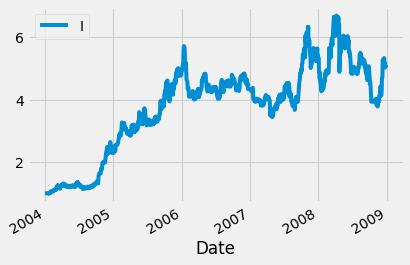

TotaAnnReturn = 79.674994
CAGR = 36.370000
Sharpe Ratio = 1.040000
Volatility= 0.383000
average return 0.002114
[-0.00270888  0.00263427]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.05600000000000005
(10, '2W-FRI-100%', 1, 2, 1, 0, 0)


/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization/Final Project/v-ratio-momentum-and-ladder/computation_helper.py:278: RuntimeWarning: invalid value encountered in double_scalars
  vratio = t/(lag*b);


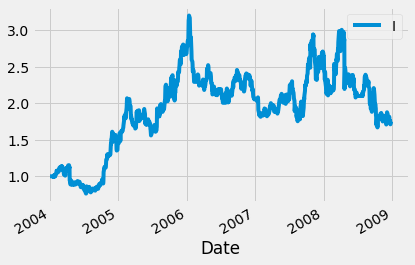

TotaAnnReturn = 14.135069
CAGR = 10.920000
Sharpe Ratio = 0.475000
Volatility= 0.391000
average return 0.000141
[-0.00274413  0.0027375 ]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.47119999999999995
(10, '3W-FRI-100%', 1, 2, 1, 0, 0)


/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization/Final Project/v-ratio-momentum-and-ladder/computation_helper.py:278: RuntimeWarning: invalid value encountered in double_scalars
  vratio = t/(lag*b);


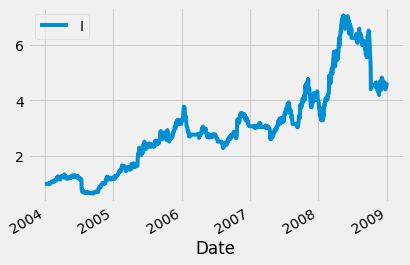

TotaAnnReturn = 71.873140
CAGR = 34.250000
Sharpe Ratio = 0.946000
Volatility= 0.420000
average return 0.001640
[-0.00279248  0.00281118]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.12680000000000002
(10, '4W-FRI-25%', 1, 2, 1, 0, 0)


/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization/Final Project/v-ratio-momentum-and-ladder/computation_helper.py:278: RuntimeWarning: invalid value encountered in double_scalars
  vratio = t/(lag*b);


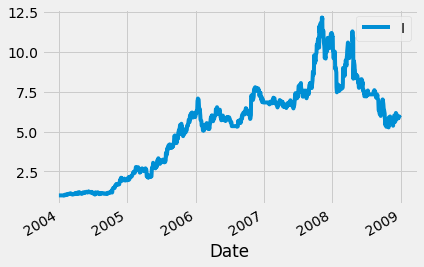

TotaAnnReturn = 95.768305
CAGR = 40.360000
Sharpe Ratio = 1.071000
Volatility= 0.409000
average return 0.002509
[-0.00320037  0.00330423]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.07140000000000002


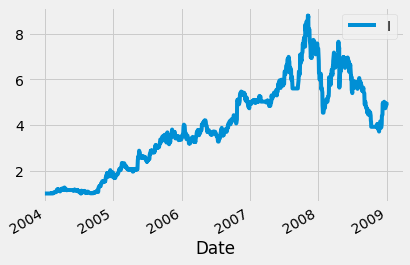

TotaAnnReturn = 78.974504
CAGR = 36.190000
Sharpe Ratio = 1.003000
Volatility= 0.403000
average return 0.000797
[-0.00292882  0.00300192]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.2954


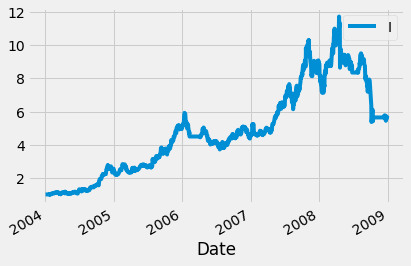

TotaAnnReturn = 93.729071
CAGR = 39.880000
Sharpe Ratio = 1.092000
Volatility= 0.392000
average return 0.001085
[-0.00250007  0.00247042]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.18899999999999995


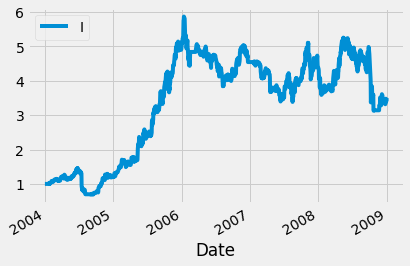

TotaAnnReturn = 49.372428
CAGR = 27.180000
Sharpe Ratio = 0.814000
Volatility= 0.419000
average return 0.002717
[-0.00319009  0.00317598]
Reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is small enough)
p_value:
0.043399999999999994

==================Overall==================


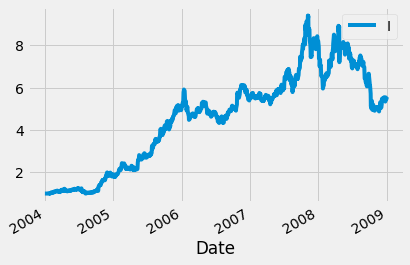

TotaAnnReturn = 89.965159
CAGR = 38.980000
Sharpe Ratio = 1.176000
Volatility= 0.342000
average return 0.001777
[-0.00229365  0.00230733]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.06520000000000004
(20, '1W-FRI-100%', 1, 2, 1, 0, 0)


/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization/Final Project/v-ratio-momentum-and-ladder/computation_helper.py:278: RuntimeWarning: invalid value encountered in double_scalars
  vratio = t/(lag*b);


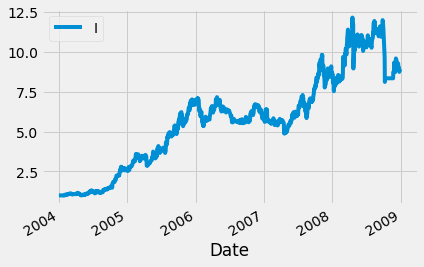

TotaAnnReturn = 153.268875
CAGR = 51.670000
Sharpe Ratio = 1.306000
Volatility= 0.393000
average return 0.002250
[-0.00303763  0.00309899]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.07599999999999996
(20, '2W-FRI-100%', 1, 2, 1, 0, 0)


/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization/Final Project/v-ratio-momentum-and-ladder/computation_helper.py:278: RuntimeWarning: invalid value encountered in double_scalars
  vratio = t/(lag*b);


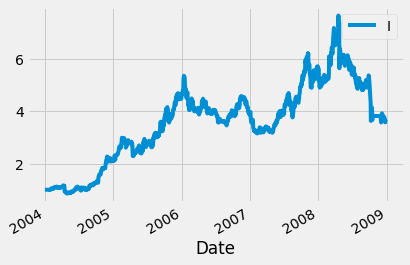

TotaAnnReturn = 50.911307
CAGR = 27.720000
Sharpe Ratio = 0.848000
Volatility= 0.395000
average return 0.000368
[-0.00285302  0.00285274]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.39180000000000004
(20, '3W-FRI-100%', 1, 2, 1, 0, 0)


/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization/Final Project/v-ratio-momentum-and-ladder/computation_helper.py:278: RuntimeWarning: invalid value encountered in double_scalars
  vratio = t/(lag*b);


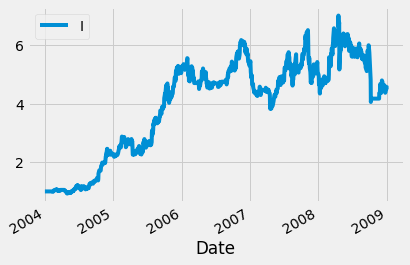

TotaAnnReturn = 71.401026
CAGR = 34.120000
Sharpe Ratio = 0.989000
Volatility= 0.387000
average return 0.002020
[-0.00282621  0.00285615]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.08720000000000006
(20, '4W-FRI-25%', 1, 2, 1, 0, 0)


/content/drive/My Drive/u of t/APS 1051 Portfolio Optimization/Final Project/v-ratio-momentum-and-ladder/computation_helper.py:278: RuntimeWarning: invalid value encountered in double_scalars
  vratio = t/(lag*b);


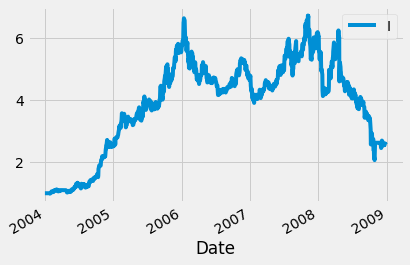

TotaAnnReturn = 30.736747
CAGR = 19.740000
Sharpe Ratio = 0.672000
Volatility= 0.402000
average return 0.000709
[-0.00311185  0.00329141]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.34119999999999995


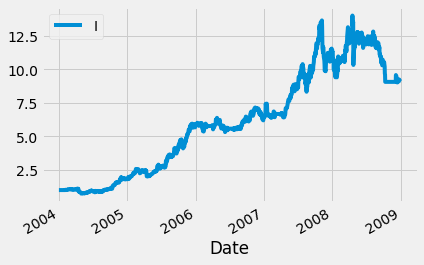

TotaAnnReturn = 159.976502
CAGR = 52.780000
Sharpe Ratio = 1.330000
Volatility= 0.392000
average return 0.002264
[-0.00279554  0.00278043]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.05920000000000003


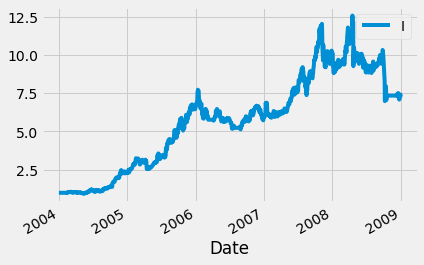

TotaAnnReturn = 127.798425
CAGR = 47.110000
Sharpe Ratio = 1.239000
Volatility= 0.387000
average return 0.001265
[-0.00283071  0.00290239]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.18120000000000003


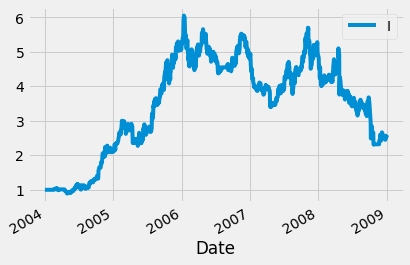

TotaAnnReturn = 31.345266
CAGR = 20.020000
Sharpe Ratio = 0.673000
Volatility= 0.410000
average return 0.001289
[-0.00315881  0.003141  ]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.2036

==================Overall==================


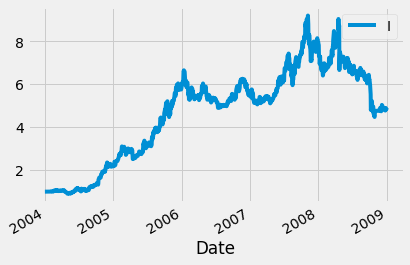

TotaAnnReturn = 77.032140
CAGR = 35.670000
Sharpe Ratio = 1.059000
Volatility= 0.365000
average return 0.001382
[-0.00255857  0.0025833 ]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.1482


In [ ]:


portf.grid_search("experiment6",
                  [10, 20],
                  ["1W-FRI-100%", "2W-FRI-100%", "3W-FRI-100%", "4W-FRI-25%"],
                  [1],
                  [2],
                  [1],
                  [0],
                  [0])